# DSP Basics: Filters 

## Spectral Leakage
When dealing with sensor data, we often need to do windowing (e.g., 2-second long data frame). However, windowing introduces a problem called "spectral leakage." As illustrated earlier, DFT basically assumes that time-domain signals are periodic. Windowing creates sharp transitions on the boundaries, which largely contributes to energy spreading and leakage to higher frequency components. 


Let's first generate a 2 Hz cosine wave whose duration is 1.8 s and sample this signal at 20 Hz. Take a careful look at the frequency spectrum. Unlike previous examples that we saw, we have frequency components beyond 2 Hz, which tend to keep decreasing though. All the signals (below and above 2 Hz) are due to spectral leakage! When we do spectral analysis, we definitely want to avoid specrtal leakage. We'll learn how we do that in this lecture.

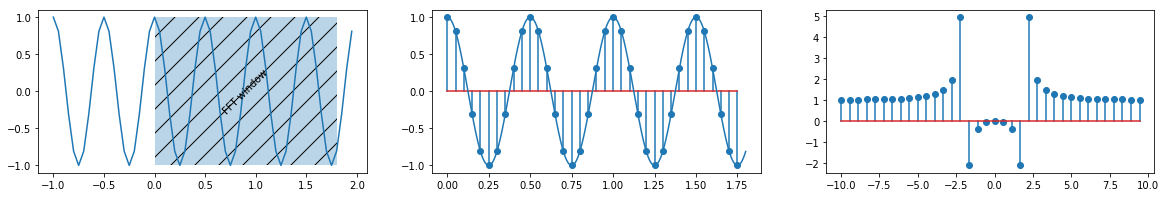

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.patches as patches
from scipy import signal

# this example is largely based on the following illustration
# https://dspillustrations.com/pages/posts/misc/spectral-leakage-zero-padding-and-frequency-resolution.html 

Fs = 20 # sampling frequency
f0 = 2# signal frequency
T = 1.8 # time duration 
t = np.arange(0, T, 1/Fs)  # the time samples
t_fine = np.arange(0, T, 1/(100*Fs))
t_long = np.arange(-1, 2, 1/Fs) 
N = len(t)
f = np.arange(-Fs/2, Fs/2, Fs/N)  # the frequency bin axis

cos_t = np.cos(2*np.pi*f0*t)  # generate the sampled signal
cos_tfine = np.cos(2*np.pi*f0*t_fine)

plt.figure(figsize=(20,3))

plt.subplot(131)
plt.plot(t_long, np.cos(2*np.pi*f0*t_long))
plt.gca().add_patch(patches.Rectangle((0, -1), T, 2, hatch='/', alpha=0.3))
plt.text(T/2, 0, "FFT window", ha='center', va='center', rotation=45)

plt.subplot(132)
plt.stem(t, cos_t)
plt.plot(t_fine, cos_tfine)

plt.subplot(133)
plt.stem(f, np.real(np.fft.fftshift(np.fft.fft(cos_t))))
#plt.legend(loc='upper right')
plt.show()


This windowed signal is supposed to be *periodic* in the time domain. Let's generate a signal by concatnating 5 instances of the same signal back to back. We drawed a solid red line to denote the connecting point of two consecutive signals. We can immediately see there's a sudden jump between the last sample of the previous signal and the first sample of the following signal. This *abrupt* change of values is the major cause of spectral leakage. 

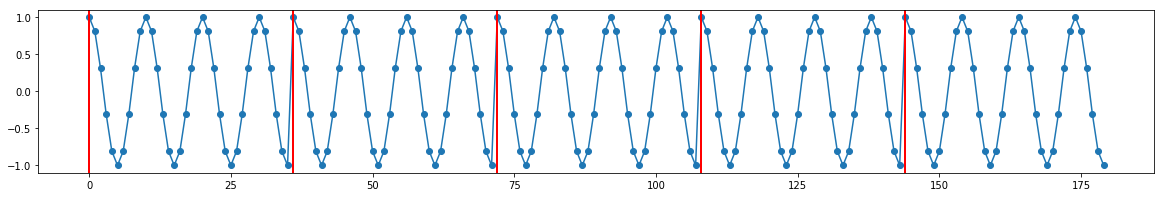

In [ ]:
dft_assumed = np.hstack([cos_t]*5)
plt.figure(figsize=(20,3))
plt.plot(dft_assumed, marker='o');
for n in range(5):
    plt.axvline(n*N, lw=2, color='red')
plt.show()    

Note that abrupt linkage could be prevented if a signal is properly windowed. In the following example, we windowed the signal at the start of a cosine wave. As you expected, multiple connections of the same signal look very much the same as the original signal without windowing!! Thus, DFT results will produce two impulse signals at the frequency domain; there is no spectral leakage. 

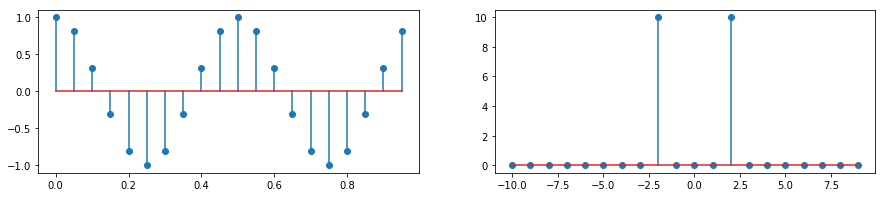

In [ ]:
T = 1; N = Fs*T
t = np.arange(0,T,1/Fs)

cos_t = np.cos(2*np.pi*f0*t)

plt.figure(figsize=(15,3))

plt.subplot(121)
plt.stem(t, cos_t);
f = np.arange(-Fs/2, Fs/2, Fs/N)

plt.subplot(122)
plt.stem(f, np.real(np.fft.fftshift(np.fft.fft(cos_t))))

plt.show()

We can solve the problem of spectral leakage by smoothing the connecting (end) points (lef & right). We can do this by multipling the original signal with a window function: e.g., $cos (t)*np.hamming(N)$ See the below plot of a hamming window; you can see that its amplitude tapers off around the ends (both on the left and right). FFT results look much cleaner than before (high/low frequency compnents have decreased significantly). 

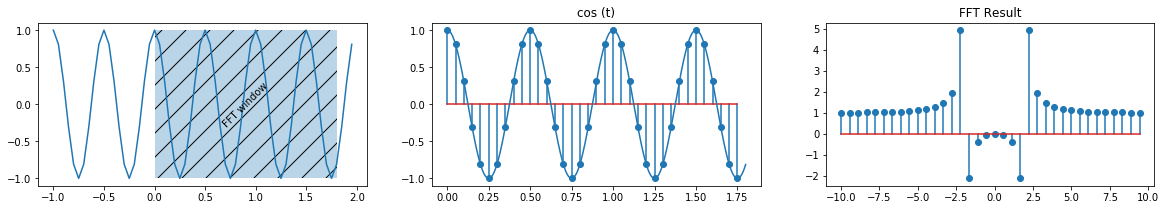

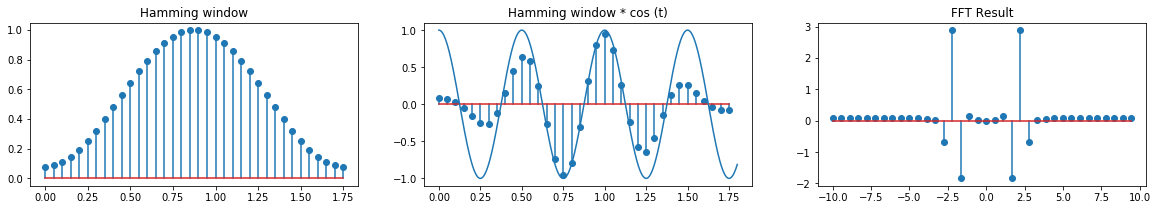

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.patches as patches
from scipy import signal

Fs = 20 # sampling frequency
f0 = 2# signal frequency
T = 1.8 # time duration 
t = np.arange(0, T, 1/Fs)  # the time samples
t_fine = np.arange(0, T, 1/(100*Fs))
t_long = np.arange(-1, 2, 1/Fs) 
N = len(t)
f = np.arange(-Fs/2, Fs/2, Fs/N)  # the frequency bin axis


cos_t = np.cos(2*np.pi*f0*t)  # generate the sampled signal
cos_tfine = np.cos(2*np.pi*f0*t_fine)

plt.figure(figsize=(20,3))

plt.subplot(131)
plt.plot(t_long, np.cos(2*np.pi*f0*t_long))
plt.gca().add_patch(patches.Rectangle((0, -1), T, 2, hatch='/', alpha=0.3))
plt.text(T/2, 0, "FFT window", ha='center', va='center', rotation=45)

plt.subplot(132)
plt.stem(t, cos_t)
plt.plot(t_fine, cos_tfine)
plt.title("cos (t)")  

plt.subplot(133)
plt.stem(f, np.real(np.fft.fftshift(np.fft.fft(cos_t))))
plt.title("FFT Result")
plt.show()

cos_t = np.cos(2*np.pi*f0*t)  # generate the sampled signal
# https://stackoverflow.com/questions/40034993/how-to-get-element-wise-matrix-multiplication-hadamard-product-in-numpy
cos_t = cos_t*np.hamming(N)
cos_tfine = np.cos(2*np.pi*f0*t_fine)

plt.figure(figsize=(20,3))

plt.subplot(131)
plt.stem(t, np.hamming(N))
plt.title("Hamming window")  
 
plt.subplot(132)
plt.stem(t, cos_t)
plt.plot(t_fine, cos_tfine)
plt.title("Hamming window * cos (t)")  

plt.subplot(133)
plt.stem(f, np.real(np.fft.fftshift(np.fft.fft(cos_t))))
#plt.legend(loc='upper right')
plt.title("FFT Result")          
plt.show()
  
  
  

If we connect a window-multiplied signal, you can see that the connection between two signals looks much smoother than before. Of course, due to hamming windowing, the resulting signal looks quite different from the original signal though. 

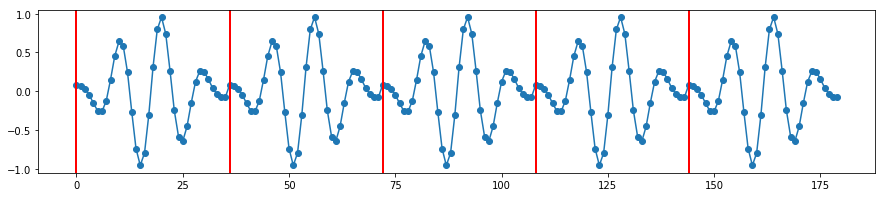

In [ ]:
dft_assumed = np.hstack([cos_t]*5)
plt.figure(figsize=(15,3))
plt.plot(dft_assumed, marker='o');
for n in range(5):
    plt.axvline(n*N, lw=2, color='red')
plt.show()

In the above examples, we used a hamming window. There are other window functions; which overall look quite similar to one another. Numpy provides various windows: Hamming, hanning, blackman, barlett, and kaiser. We plotted these graphs below. Among these windows, a hamming window is widely used to prevent spectral leakage. 

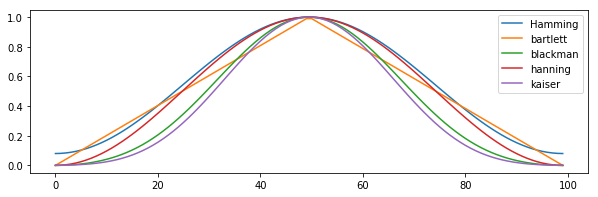

In [ ]:
# Other windows: bartlett, blackman, hanning, kaiser
# https://matplotlib.org/tutorials/introductory/pyplot.html 

import numpy as np
import matplotlib.pyplot as plt  
from scipy import signal

# np.arange(0., 5., 0.2)
#np.linspace(0, 2*np.pi*f1*sample_duration, num_samples+1) 
num_samples = 100
n = np.arange(num_samples) 

plt.figure(figsize=(10,3))
plt.plot(n, np.hamming(num_samples), label='Hamming')
plt.plot(n, np.bartlett(num_samples), label='bartlett')
plt.plot(n, np.blackman(num_samples), label='blackman')
plt.plot(n, np.hanning(num_samples), label='hanning')
plt.plot(n, np.kaiser(num_samples, 10), label='kaiser') # additionally requires beta value
plt.legend(loc='upper right')
plt.show()

## Convolution

Numpy supports convolution: np.convolve(a, b). Let's check out the example that we saw in the lecture note. 


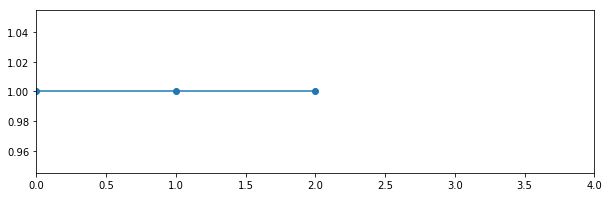

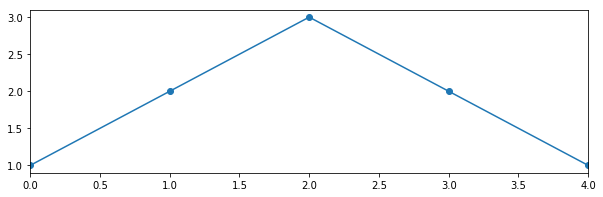

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy import signal

a = np.array([1, 1, 1])
b = np.array([1, 1, 1])
n = np.arange(1, len(a)+1, 1) 

acb = np.convolve(a, b)
plt.figure(figsize=(10,3))
plt.xlim(0, 4)
plt.plot(a, marker='o') 
plt.figure(figsize=(10,3))
plt.plot(acb, marker='o')  
plt.xlim(0, 4)
plt.show()

## Ideal Low-pass Filter

We'll build and test an ideal low-pass filter at the frequency domain. This ideal low-pass filter will then be transformed to the time domain (via inverse FFT); convolution will be used for filtering later on. 

We will generate a signal which consists of a 2 Hz main frequency cosine wave and noise signals (a 10 Hz cosine wave + white noise). In our example below, we'll set the cutoff frequency to 0.1. The sampling rate (Fs) is given as 50 Hz, and thus, the cutoff frequency will be 50\*0.1 = 5 Hz. This means that all the higher frequency components (i.e., 10 Hz + white noise) will be removed if we appy this low-pass filter. 

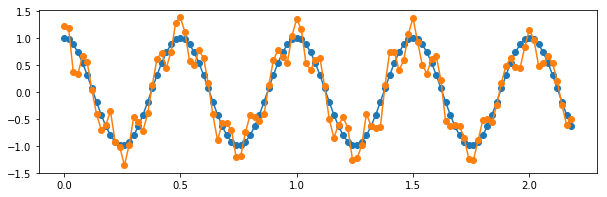

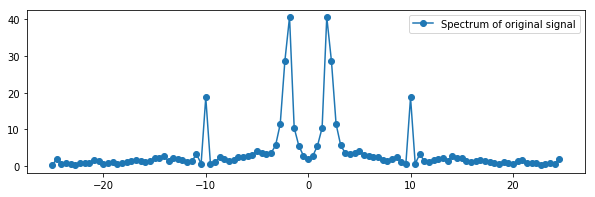

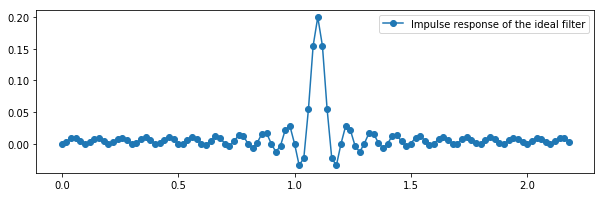

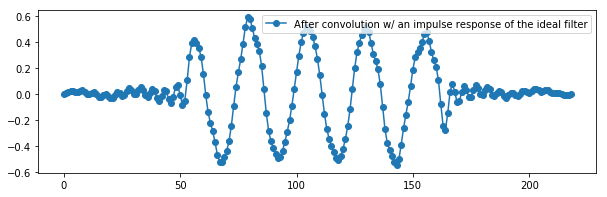

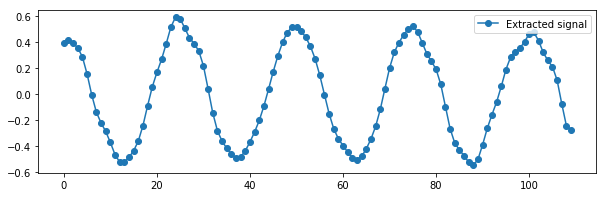

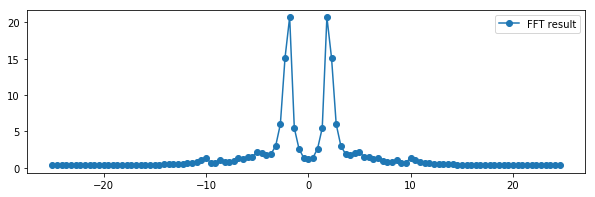

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.patches as patches
from scipy import signal


Fs = 50 # sampling frequency

f0 = 2# signal frequency
f1 = 10 # signal frequency 
mu = 0 
sigma = 0.1

T = 2.2 # time duration 


t = np.arange(0, T, 1/Fs)  # the time samples
N = len(t)
f = np.arange(-Fs/2, Fs/2, Fs/N)  # the frequency bin axis

cos_t_f0 = np.cos(2*np.pi*f0*t) 
cos_t = np.cos(2*np.pi*f0*t)  + 0.3*np.cos(2*np.pi*f1*t) + np.random.normal(mu, sigma, len(t))
 

plt.figure(figsize=(10, 3))
plt.plot(t, cos_t_f0, label='cos (f0*t)', marker='o')  
plt.plot(t, cos_t, label='cos (t)', marker='o')  
#plt.legend(loc='upper right')
plt.show()

#print(f.shape); print(cos_t.shape)
plt.figure(figsize=(10, 3))
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(cos_t))), marker='o', label='Spectrum of original signal')
plt.legend(loc='upper right')  
plt.show()

fc = 0.1 
# fc = 0.3 # cut-off frequency ratio; i.e., Fs*0.1 
# # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
ones = int(N*fc*2)
zeros = N-ones
#print(ones, zeros)

dft_assumed = np.hstack([np.ones(ones), np.zeros(zeros)] )
#print(dft_assumed.shape)

ift = np.fft.fftshift(np.fft.ifft(dft_assumed))
plt.figure(figsize=(10, 3))
plt.plot(t, np.real(ift), marker='o', label='Impulse response of the ideal filter')
plt.legend(loc='upper right') 
plt.show()  
 
s = np.convolve(cos_t, np.real(ift))

half_N = int(np.floor(N/2))

plt.figure(figsize=(10, 3))
plt.plot( s, marker='o', label='After convolution w/ an impulse response of the ideal filter')
plt.legend(loc='upper right')
plt.show() 

plt.figure(figsize=(10, 3))
plt.plot( s[half_N:half_N+N], marker='o', label='Extracted signal')
plt.legend(loc='upper right')
plt.show()  

plt.figure(figsize=(10, 3)) 
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(s[half_N:half_N+N]))), marker='o', label='FFT result')
plt.legend(loc='upper right')
plt.show()


# The following example shows how you use the sinc-window func for low-pass filtering 
# see https://tomroelandts.com/articles/how-to-create-a-simple-low-pass-filter 

## Moving Average Filter

SciPy doesn't have a moving average filter, but it's very easy to implement: it's simply an average of recent *k* samples. We simply need to prepare for filter coefficients (b = repeat(1.0/n, n)) and then put this configuration with the signal into signal.lfilter(b, 1, x), which produces the filtered signal.  

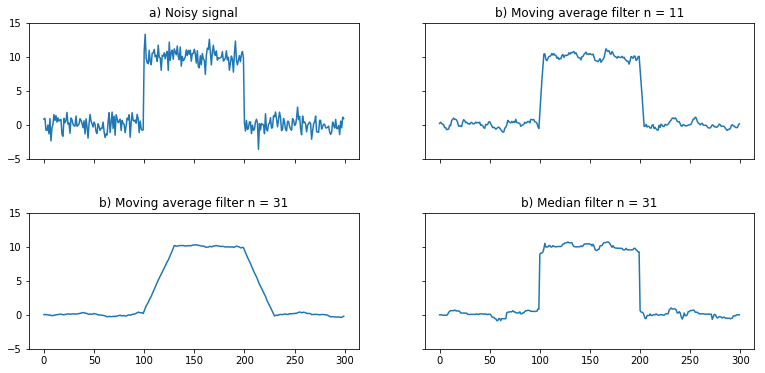

In [ ]:
# this example is based on Matti Pastell's book titled, 
# "Measurements and Data Analysis for Agricultural Engineers Using Python" 
# http://pyageng.mpastell.com/book/index.html 

from scipy import signal
from pylab import *

import matplotlib.pyplot as plt 


# average of recent k samples 
def ma(x, n = 5):
    b = repeat(1.0/n, n) #Create impulse response
    xf = signal.lfilter(b, 1, x) #Filter the signal
    return(xf)
  
ym = hstack([repeat(0, 100), repeat(10, 100), repeat(0, 100)])
noisy = ym+randn(300)

#Moving average filters
ym11 = ma(noisy)
ym31 = ma(noisy, 31)

#Median filter from scipy.signal
ymed11 = signal.medfilt(noisy, 11)

#Plots with shared x and y-axis

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(13, 6))
ax1.plot(noisy)
ax1.set_title("a) Noisy signal")
ax1.set_ylim([-5, 15])
ax2.plot(ym11)
ax2.set_title("b) Moving average filter n = 11")
ax3.plot(ym31)
ax3.set_title("b) Moving average filter n = 31")
ax4.plot(ymed11)
ax4.set_title("b) Median filter n = 31")
subplots_adjust(hspace=0.4)

## Finite impulse response (FIR) filter

Let's first define a function that visualizes the characteristics of a filter. These functions are from Matti Pastell's book titled, "[Measurements and Data Analysis for Agricultural Engineers Using Python](http://pyageng.mpastell.com/book/index.html)" 
 

In [ ]:
# this example is based on Matti Pastell's book titled, 
# "Measurements and Data Analysis for Agricultural Engineers Using Python" 
# http://pyageng.mpastell.com/book/index.html 

from scipy import signal
from pylab import *

import matplotlib.pyplot as plt 

# Compute the frequency response of a digital filter and plot its spectrum in dB 
def plot_freqz(b,a=1):
    w, h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h)) # amplitude in dB 
    plot(w/pi, h_dB)
    ylim([max(min(h_dB), -100), 5])
    ylabel('Magnitude (dB)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Amplitude response')

# Given the M-order numerator b and N-order denominator a of a digital filter, compute its frequency response:
#             jw                 -jw              -jwM
#    jw    B(e  )    b[0] + b[1]e    + ... + b[M]e
# H(e  ) = ------ = -----------------------------------
#             jw                 -jw              -jwN
#          A(e  )    a[0] + a[1]e    + ... + a[N]e

# w (ndarray): The frequencies at which h was computed, in the same units as fs. By default, w is normalized to the range [0, pi) (radians/sample).
# h (ndarray) The frequency response, as complex numbers.
    
# plot a phase response of a given filter: b, a 
def plot_phasez(b, a=1):
    w, h = signal.freqz(b,a)
    h_Phase = unwrap(np.angle(h))
    # h_Phase = unwrap(arctan2(imag(h), real(h)))
    # Unwrap by changing deltas between values to 2*pi complement.
    # Unwrap radian phase p by changing absolute jumps greater than discont to their 2*pi complement along the given axis.
    plot(w/pi, h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')

# plot an impulse reponse of a given filter: b, a 
def plot_impz(b, a = 1):
  
    # examine parameters (b, a) to check it's FIR or IRR filter 
    if type(a) == int: # FIR
        l = len(b)
    else: # IIR
        l = 100
    # generate a unit impulse signal 
    impulse = repeat(0., l); impulse[0] = 1. 
    x = arange(0, l)
    
    response = signal.lfilter(b, a, impulse)
    stem(x, response, linefmt='b-', basefmt='b-', markerfmt='bo')
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')  

# find cumulative summation of the impulse response  
def plot_stepz(b, a = 1):
    if type(a)== int: #FIR
        l = len(b)
    else: # IIR
        l = 100
    impulse = repeat(0.,l); impulse[0] = 1.
    x = arange(0,l)
    response = signal.lfilter(b, a, impulse)
    
    # cumulative summation of the impulse response  
    step = cumsum(response)
    
    plot(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')    

# plot filter's frequency response, phases, impulse/step responses.  
def plot_filterz(b, a=1):
    figure(figsize=(13, 3))
    subplot(221)
    plot_freqz(b, a)
    subplot(222)
    plot_phasez(b, a)
    subplot(223)
    plot_impz(b, a)
    subplot(224)
    plot_stepz(b, a)
    subplots_adjust(hspace=1, wspace = 0.3)  
    show()
    #subplots_adjust(hspace=0.4)

In the example below, we'll use a low-pass filter: *b = signal.firwin(n, cutoff = 0.2, window = "hamming")* 

*firwin* supports FIR filter design using the window method.

Cutoff frequency of filter is expressed in the same units as nyq OR an array of cutoff frequencies (that is, band edges). Cutoff frequency ranges from 0.0 to 1.0 with 1.0 being Nyquist. 0.0 to 1.0 with 1.0 being Nyquist.

Other window functions: boxcar, triang, blackman, hamming, hann, bartlett, flattop, parzen, bohman, blackmanharris, nuttall, barthann, kaiser (needs beta), gaussian (needs std), general_gaussian (needs power, width), slepian (needs width), chebwin (needs attenuation).

We can configure other filter types: 


*   low-pass: signal.firwin(numtaps, cutoff=f)
*   high-pass: signal.firwin(numtaps, cutoff=f, pass_zero=False)
*   band-pass: signal.firwin(numtaps, cutoff=[f1, f2], pass_zero=False)  // If pass_zero=True, the gain at the frequency 0 (i.e. the DC gain) is 1. 
*   band-stop: signal.firwin(numtaps, cutoff=[f1, f2])
*   multi-band pass:  signal.firwin(numtaps, cutoff=[f1, f2, f3, f4]) // passbands are [0, f1], [f2, f3] and [f4, 1]):
  
  

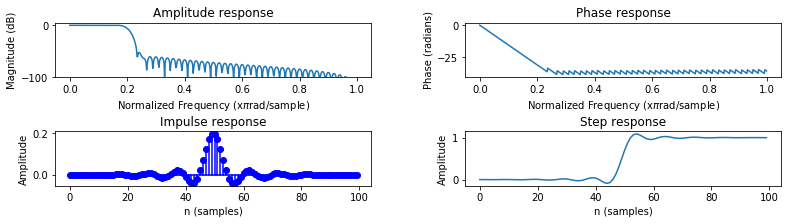

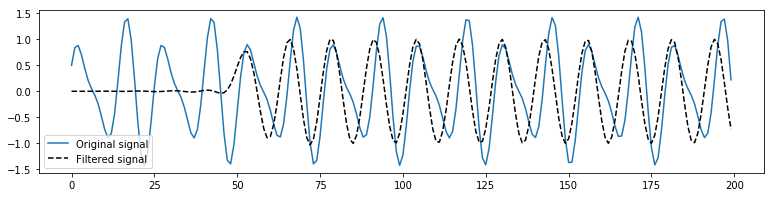

In [ ]:
from scipy import signal
from pylab import *

import matplotlib.pyplot as plt 

    
n = 100
#Design filter
# Use a specific window function: "hamming"
b = signal.firwin(n, cutoff = 0.2, window = "hamming")
# cutoff frequency typically ranges from 0.0 to 1.0 with 1.0 being Nyquist.

#Plot properties
plot_filterz(b)

x = sin(linspace(0, 500, 1024)) + 0.5*cos(linspace(0, 750, 1024))
+ randn(1,1024)*0.2 + 0.2*cos(linspace(0, 10000, 1024));

xfiltered = signal.lfilter(b, 1, x)

figure(figsize=(13, 3))
plot(x[:200], label = "Original signal")
plot(xfiltered[:200], "--k", label = "Filtered signal")
legend()
show()

We can apply a window filter to our examples earlier. Let's generate a noised added cosine wave: $cos_t = np.cos(2*np.pi*f0*t)  + 0.3*np.cos(2*np.pi*f1*t) + np.random.normal(mu, sigma, len(t))$

We set the cutoff frequency to 0.2; in this case, the cutoff frequency is given as 0.2 * Fs / 2 = 0.2 * 100 / 2 = 10 Hz. 

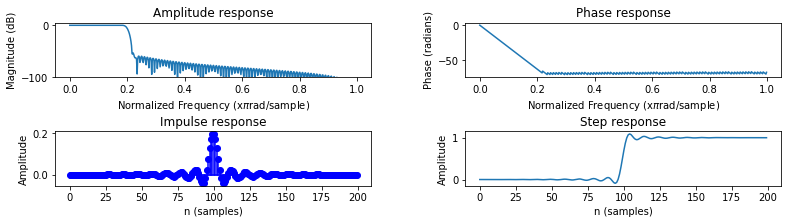

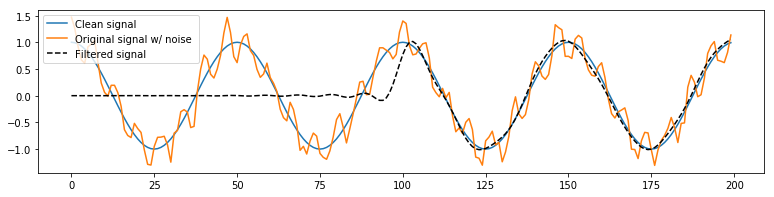

In [ ]:
from scipy import signal
from pylab import *

import matplotlib.pyplot as plt 

Fs = 100 # sampling frequency

f0 = 2# signal frequency
f1 = 15 # signal frequency 
mu = 0 
sigma = 0.1

T = 2 # time duration 


t = np.arange(0, T, 1/Fs)  # the time samples
N = len(t)
f = np.arange(-Fs/2, Fs/2, Fs/N)  # the frequency bin axis

cos_t_f0 = np.cos(2*np.pi*f0*t) 
cos_t = np.cos(2*np.pi*f0*t)  + 0.3*np.cos(2*np.pi*f1*t) + np.random.normal(mu, sigma, len(t))
 
  
    
#n = 100
#Design filter
# Use a specific window function: "hamming"
b = signal.firwin(N, cutoff = 0.2, window = "hamming")
# cutoff frequency typically ranges from 0.0 to 1.0 with 1.0 being Nyquist.
# 0.2 * Fs / 2 = 0.2 * 100 / 2 = 10 Hz 

#Plot properties
plot_filterz(b)

cos_t_filtered = signal.lfilter(b, 1, cos_t)

figure(figsize=(13, 3))
plot(cos_t_f0[:200], label = "Clean signal ")
plot(cos_t[:200], label = "Original signal w/ noise ")
plot(cos_t_filtered[:200], "--k", label = "Filtered signal")
#plot(cos_t, label = "Original signal")
#plot(xfiltered, "--k", label = "Filtered signal")
legend()
show()

## Infinite impulse response (IIR) filter

Let's take a look at the butterworth filter: *scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba')*. The function "butter" produces an Nth order digital or analog Butterworth filter, by returning the filter coefficients in (B, A) or (Z, P, K) form. 

These are the parameters to specify: 

*   N : int // The order of the filter.
*   Wn : array_like // A scalar or length-2 sequence giving the critical frequencies. For a Butterworth filter, this is the point at which the gain drops to 1/sqrt(2) that of the passband (the “-3 dB point”). For digital filters, Wn is normalized from 0 to 1, where 1 is the Nyquist frequency, pi radians/sample. (Wn is thus in half-cycles / sample.) For analog filters, Wn is an angular frequency (e.g. rad/s).
*   btype : {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}, optional // The type of filter. Default is ‘lowpass’.
*   analog : bool, optional / When True, return an analog filter, otherwise a digital filter is returned.
*   output : {‘ba’, ‘zpk’}, optional / Type of output: numerator/denominator (‘ba’) or pole-zero (‘zpk’). Default is ‘ba’.

Please read more about [butter](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html) and [cheby2](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.cheby2.html). 
  


Buterworth low-pass filter: 12, 0.2


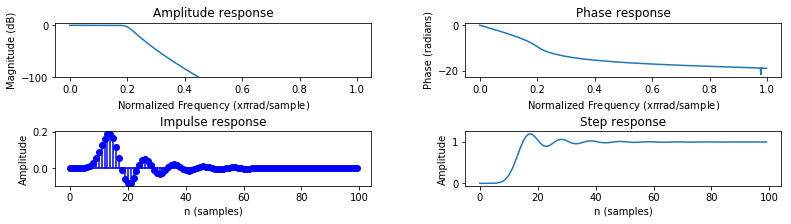


Chebyshev low-pass filter: 12, 80, 0.2


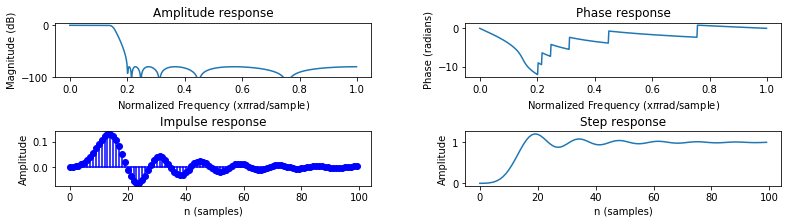


Elliptic bandpass filter and chebyshev I highpass filter.


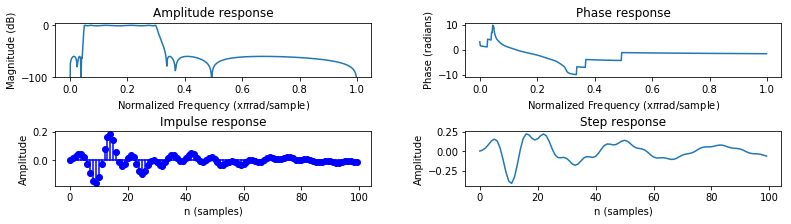

In [ ]:
from scipy import signal

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html
# Buterworth low-pass filter   
print("\nButerworth low-pass filter: 12, 0.2")
[b, a] = signal.butter(12, 0.2);
plot_filterz(b, a)

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.cheby2.html
# Chebyshev low-pass filter   
print("\nChebyshev low-pass filter: 12, 80, 0.2")
[b, a] = signal.cheby2(12, 80, 0.2)
plot_filterz(b, a)

# Elliptic bandpass filter and chebyshev I highpass filter.  
print("\nElliptic bandpass filter and chebyshev I highpass filter.")
[b, a] = signal.iirdesign(wp=[0.05, 0.3], ws=[0.02, 0.35], gstop=60, gpass=1, ftype='ellip')
# wp/ws: Passband and stopband edge frequencies
# gpass : float / The maximum loss in the passband (dB)
# gstop : float / The minimum attenuation in the stopband (dB)
plot_filterz(b, a)

## Cross-correlation

In [ ]:
import numpy as np

# numpy.correlate
# Cross-correlation of two 1-dimensional sequences.
# This function computes the correlation as generally defined in signal processing texts:
# c_{av}[k] = sum_n a[n+k] * conj(v[n])
# with a and v sequences being zero-padded where necessary and conj being the conjugate.

#x[n] = {3, 1, 4} and y[n] = {2, 7, 1}.
 
x = np.array([3, 1, 4])
y = np.array([2, 7, 1])

np.correlate(x, y)
print("Correlation", np.correlate(x, y))
 
np.correlate(x, y, "same")
print("Cross-correlation (same): ", np.correlate(x, y, "same"))
#array([2. ,  3.5,  3. ])

np.correlate(x, y, "full")
#array([0.5,  2. ,  3.5,  3. ,  0. ])
print("Cross-correlation (full): ", np.correlate(x, y, "full"))



Correlation [17]
Cross-correlation (same):  [22 17 30]
Cross-correlation (full):  [ 3 22 17 30  8]


## Autocorrelation

In [ ]:
from scipy import signal
from pylab import *
import numpy as np

# find autocorrelation 
def autocorr(x, lags=1):
   return np.array([np.correlate(x, x)[0]]+[np.correlate(x[:-i], x[i:])[0] for i in range(1, lags)])

# alternatively, we can make use of *full& cross-correlation 
def autocorr2(x, lags=1):
  rst = np.correlate(x, x, mode='full')
  return rst[rst.size//2:]  
  #return rst
  
def autocorr3(x, lags=1):
  return np.correlate(x, x, mode='full') 

#def autocorr4(x):
#    r2=np.fft.ifft(np.abs(np.fft.fft(x))**2).real
#    return r2 #r2[:len(x)//2]

# find (normalized) autocorrelation  
def autocorr_normalized(x, lags=1):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0, 1]  \
      for i in range(1, lags)])  
 
  # corrcoef() returns a correlation matrix; e.g., 
  # array([[ 1.        ,  0.81543901],
  #        [ 0.81543901,  1.        ]])
  # read more details about using corrcoef() in this article  # how to use corrcoef: http://benalexkeen.com/correlation-in-python/

x = np.array([3, 1, 4])

print("Autocorrelation:", autocorr(x, len(x))) 
print("Autocorrelation:", autocorr2(x, len(x))) 
print("Autocorrelation (normalized):", autocorr_normalized(x, len(x)-1))  
  

Autocorrelation: [26  7 12]
Autocorrelation: [26  7 12]
Autocorrelation (normalized): [ 1. -1.]


For biosignal processing, let's use [BioSPPY package](https://biosppy.readthedocs.io/en/stable/).

In [ ]:
 
  # https://biosppy.readthedocs.io/en/stable/
 !pip install biosppy 


     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 40kB 16.1MB/s 
  Created wheel for shortuuid: filename=shortuuid-0.5.0-cp36-none-any.whl size=5499 sha256=3fdb67cb5484387bdb5fbdbc1dd29d1335e37a547f673230b496c4be43a2ffac
  Stored in directory: /root/.cache/pip/wheels/3f/eb/fd/69e5177f67b505e44acbd1aedfbe44b91768ee0c4cd5636576
Successfully built shortuuid


Now let's take a look at how autocorrelation can be used to find whether a singal is periodic or not. 

First download a sample ECG signal in [this link](https://raw.githubusercontent.com/PIA-Group/BioSPPy/master/examples/ecg.txt). And upload this file to your local folter on the left panel (simply drag and drop the file). The dataset was collected w/ the sampling rate of 1000 Hz. In the example below, we only consider a two-second window. We'll check both autocorrelation results as well as the frequency spectrum of the orignal signal. 

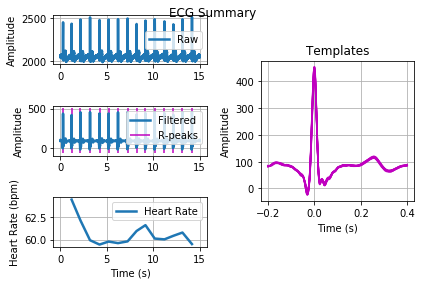

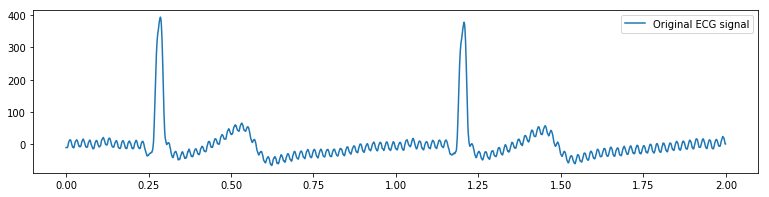

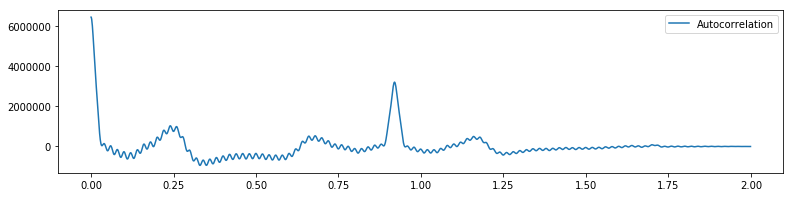

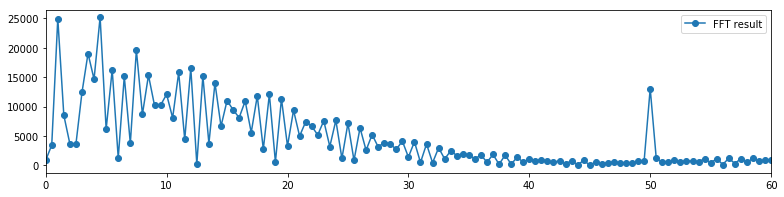

In [ ]:
import numpy as np
from pylab import *
from biosppy.signals import ecg

# load raw ECG signal
# download a sample ECG signal: https://raw.githubusercontent.com/PIA-Group/BioSPPy/master/examples/ecg.txt
# and upload it to your local folder 

# Sampling Rate (Hz):= 1000.00
# Resolution:= 12
# Labels:= ECG / EKG
# Electrocardiogram (ECG or EKG) 
# An electrocardiogram — abbreviated as EKG or ECG — is a test that measures the electrical activity of the heartbeat. 
# With each beat, an electrical impulse (or “wave”) travels through the heart. 
# This wave causes the muscle to squeeze and pump blood from the heart. 
# A normal heartbeat on ECG will show the timing of the top and lower chambers.


signal = np.loadtxt('./ecg.txt')

# process it and plot
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

signal = signal-np.mean(signal)

def autocorr_normalized(x, lags=1):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0, 1]  \
      for i in range(1, lags)])  

def autocorr(x, lags=1):
   return np.array([np.correlate(x, x)[0]]+[np.correlate(x[:-i], x[i:])[0] for i in range(1, lags)])
  
signal_auto = autocorr(signal[:2000], lags=len(signal[:2000]))

Fs = 1000
N = 2000

figure(figsize=(13, 3))
t = np.arange(0, 2, 2/N)  # the frequency bin axis
plot(t, signal[:2000], label = "Original ECG signal") 
legend(loc='upper right')
show()

figure(figsize=(13, 3))
plot(t, signal_auto-np.mean(signal_auto), label = "Autocorrelation") 
legend(loc='upper right')
show()

figure(figsize=(13, 3))
f = np.arange(-Fs/2, Fs/2, Fs/N)  # the frequency bin axis
#plot(f, np.abs(np.fft.fftshift(np.fft.fft( signal[:2000]*np.hamming(N) ))), marker='o', label='FFT result')
plot(f, np.abs(np.fft.fftshift(np.fft.fft( signal[:2000]))), marker='o', label='FFT result')
legend(loc='upper right')
xlim(0, 60)
show()

# More data: https://data.mendeley.com/datasets/7dybx7wyfn/3

# Homework #6 (Due Apr. 11, 23:59:59)

##1) Checking periodicity of acceleration data 
Use CrowdSignal's acceleration data from a smartwatch (X, Y, Z). Acceleration signals collected while walking would be extreamly periodic. In contrast, those collected while sitting or on the table would not show any periodicity. Select acceleration data segments from four activities (i.e., two from periodic vs. two from non-periodic activities). (1) Analyze frequency spectrum of these signals (for this, use only a 10-s long sample data), and (2) Calculate auto-correlation and plot the results for visual comparision. The auto-correlation results would be similar to Figure 5 in the Recofit work published at CHI'14 ([PDF](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/12/p3225-morris.pdf)). 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
dataset_directory = '/content/drive/My Drive/EE5104 Datasets/'

Mounted at /content/drive


     sensor_type device_type           timestamps      x      y      z  \
0  accelerometer  smartwatch  1454956216008085521  9.546  0.194  1.496   
1  accelerometer  smartwatch  1454956216013297083  9.570  0.182  1.518   
2  accelerometer  smartwatch  1454956216018266927  9.570  0.182  1.518   
3  accelerometer  smartwatch  1454956216023238541  9.570  0.182  1.518   
4  accelerometer  smartwatch  1454956216028210677  9.570  0.182  1.518   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
No handles with labels found to put in legend.


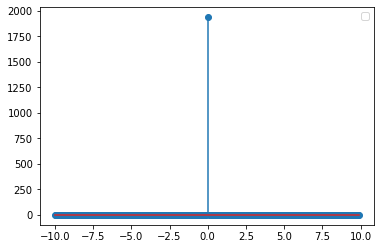

In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/EE5104 Datasets/crowdsignals.io/accelerometer_smartwatch.csv')
print(df.head())
df_xyz = sqrt(df['x']**2 + df['y']**2 + df['z']**2)[:200]
# type(np.array(df_xyz))

Fs = 20 # sampling frequency
T = 10 # time duration 
t = np.arange(0, T, 1/Fs)  # the time samples
N = len(t)
f = np.arange(-Fs/2, Fs/2, Fs/N)  # the frequency bin axis
plt.stem(f, np.real(np.fft.fftshift(np.fft.fft(np.array(df_xyz)))))
plt.legend(loc='upper right')
plt.show()


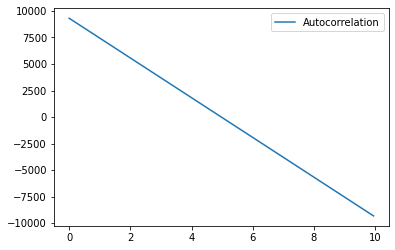

In [47]:
def autocorr(x, lags=1):
   return np.array([np.correlate(x, x)[0]]+[np.correlate(x[:-i], x[i:])[0] for i in range(1, lags)])

df_xyz_auto = autocorr(df_xyz[:200], lags=len(df_xyz[:200]))
df_xyz_auto
# figure(figsize=(13, 3))
plot(t, df_xyz_auto-np.mean(df_xyz_auto), label = "Autocorrelation") 
legend(loc='upper right')
show()

##2) Low pass filtering of the ECG data
Use both FIR and IIR filters to remove high frequency components in the ECG dataset that we used in this lecture. You need to carefully think of how to set the cutoff frequency. You can choose any filters you want to use. Vary the cutoff frequency (and plot the results) and reason which setting looks best. 

In [ ]:
 !pip install biosppy 

[-1.59218611e-04 -4.30359456e-04 -5.61775255e-04 -4.89840873e-04
 -2.05138661e-04  2.27954566e-04  6.69705997e-04  9.35068105e-04
  8.57842323e-04  3.72230362e-04 -4.22936842e-04 -1.25690281e-03
 -1.76050993e-03 -1.61030624e-03 -6.93627792e-04  7.80061826e-04
  2.29029732e-03  3.16604226e-03  2.85684092e-03  1.21395713e-03
 -1.34722713e-03 -3.90545357e-03 -5.33416973e-03 -4.75948674e-03
 -2.00167138e-03  2.20073166e-03  6.32676722e-03  8.57892909e-03
  7.60816073e-03  3.18414006e-03 -3.48824885e-03 -1.00061473e-02
 -1.35587458e-02 -1.20362473e-02 -5.05169320e-03  5.56163408e-03
  1.60719426e-02  2.20021749e-02  1.97997386e-02  8.45913864e-03
 -9.52904861e-03 -2.83612130e-02 -4.03338357e-02 -3.81486832e-02
 -1.74151873e-02  2.14846298e-02  7.28584291e-02  1.26785617e-01
  1.71588241e-01  1.96987400e-01  1.96987400e-01  1.71588241e-01
  1.26785617e-01  7.28584291e-02  2.14846298e-02 -1.74151873e-02
 -3.81486832e-02 -4.03338357e-02 -2.83612130e-02 -9.52904861e-03
  8.45913864e-03  1.97997

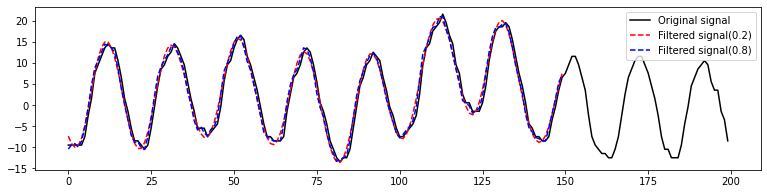

In [61]:
import numpy as np
from pylab import *
from scipy import signal
import matplotlib.pyplot as plt 


df = np.loadtxt('/content/drive/MyDrive/Sensor Data Science/ecg.txt')
df = df-np.mean(df)
n = 100
b1 = signal.firwin(n, cutoff = 0.2, window = "hamming")
print(b1)
xfiltered_1 = signal.lfilter(b1, 1, df)
b2 = signal.firwin(n, cutoff = 0.8, window = "hamming")
xfiltered_2 = signal.lfilter(b2, 1, df)
figure(figsize=(13, 3))
plot(df[:200], label = "Original signal", color='black')
plot(xfiltered_1[50:200], "--k", label = "Filtered signal(0.2)", color='red')
plot(xfiltered_2[50:200], "--k", label = "Filtered signal(0.8)", color='blue')
legend()
show()

## cutoff 0.8 setting looks better than 0.2.

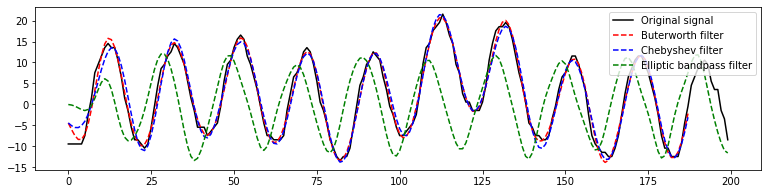

In [89]:
from scipy import signal
n = 100
# b = signal.firwin(n, cutoff = 0.8, window = "hamming")

# print("\nButerworth low-pass filter: 12, 0.2")
[b1, a1] = signal.butter(12, 0.2);
# print(b1, a1)
# print("\nChebyshev low-pass filter: 12, 80, 0.2")
[b2, a2] = signal.cheby2(12, 80, 0.2)
# print(b2)
# print("\nElliptic bandpass filter and chebyshev I highpass filter.")
[b3, a3] = signal.iirdesign(wp=[0.05, 0.3], ws=[0.02, 0.35], gstop=60, gpass=1, ftype='ellip')
# print(b2)

xfiltered_1 = signal.lfilter(b1, a1, df)
xfiltered_2 = signal.lfilter(b2, a2, df)
xfiltered_3 = signal.lfilter(b3, a3, df)
figure(figsize=(13, 3))
plot(df[:200], label = "Original signal", color='black')
plot(xfiltered_1[12:200], "--k", label = "Buterworth filter", color='red')
plot(xfiltered_2[12:200], "--k", label = "Chebyshev filter", color='blue')
plot(xfiltered_3[:200], "--k", label = "Elliptic bandpass filter", color='green')
legend()
show()

##3) Counting peaks in the ECG data
By counting peaks in the ECG data, we can find the heart rate (i.e., beats per minute). Use the above ECG dataset (entire duration) and design a simple algorithm for counting peaks. A very simple approach would be simple peak-picking among the samples---peak values are much greater than other values! Alternatively we can use an estimated period (using autocorrelation) to infer the beats per minute. Compare two different approaches (i.e., simple peak-picking vs. period estimation w/ autocorrelation) and check which one is more accurate. 

In [112]:
from scipy.signal import find_peaks
import numpy as np
# from pylab import *
# from scipy import signal
# import matplotlib.pyplot as plt 
import plotly.graph_objects as go

df = np.loadtxt('/content/drive/MyDrive/Sensor Data Science/ecg.txt')
time_series = df
print('original data length :', len(time_series))
indices = find_peaks(time_series, threshold=-1.2)[0]
count_peaks = len(indices)
print('count peaks : ', count_peaks)

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))
fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.update_xaxes(rangeslider_visible=True, title='Peak Detection with Rangeslider')

fig.show()

original data length : 15000
count peaks :  890


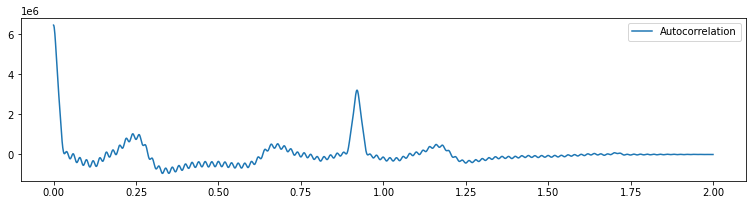

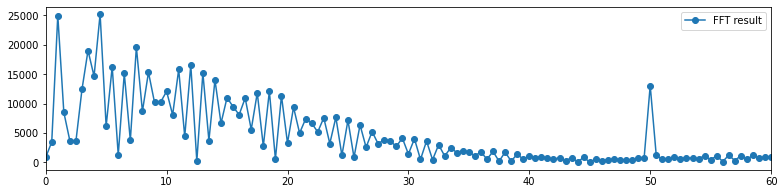

In [120]:
import numpy as np
from pylab import *
from biosppy.signals import ecg

signal = np.loadtxt('/content/drive/MyDrive/Sensor Data Science/ecg.txt')
# out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)
signal = signal-np.mean(signal)

def autocorr(x, lags=1):
   return np.array([np.correlate(x, x)[0]]+[np.correlate(x[:-i], x[i:])[0] for i in range(1, lags)])
  
signal_auto = autocorr(signal[:2000], lags=len(signal[:2000]))

Fs = 1000
N = 2000

figure(figsize=(13, 3))
t = np.arange(0, 2, 2/N)  # the frequency bin axis
plot(t, signal_auto-np.mean(signal_auto), label = "Autocorrelation") 
legend(loc='upper right')
show()

figure(figsize=(13, 3))
f = np.arange(-Fs/2, Fs/2, Fs/N)  # the frequency bin axis
plot(f, np.abs(np.fft.fftshift(np.fft.fft( signal[:2000]))), marker='o', label='FFT result')
legend(loc='upper right')
xlim(0, 60)
show()